In [3]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import GPy
import numpy as np
import main

In [4]:
_file = open("./data_silce/building_0_floor_0.csv", "r")
df: pd.DataFrame = pd.read_csv(_file)

In [5]:
df_sub = df[["WAP007", "LONGITUDE", "LATITUDE"]]

In [6]:
df_sub.groupby(["LONGITUDE","LATITUDE"]).size().reset_index().rename(columns={0:"count"})

,LONGITUDE,LATITUDE,count
0,-7685.7235,4.864930e+06,20
1,-7684.2824,4.864932e+06,20
2,-7682.5438,4.864932e+06,20
3,-7680.1346,4.864931e+06,20
4,-7676.6271,4.864934e+06,20
5,-7675.3525,4.864933e+06,20
6,-7674.9559,4.864935e+06,20
7,-7669.2335,4.864936e+06,20
8,-7667.3398,4.864937e+06,20
9,-7661.8969,4.864935e+06,19


In [40]:
d = {"LONGITUDE": "LONGITUDE", "LATITUDE": "LATITUDE", "WAP007": "WAP007"}
# df = df_sub.groupby(["LONGITUDE", "LATITUDE"]).agg({"WAP007": "mean"})
df = df_sub.groupby(["LONGITUDE", "LATITUDE"],as_index=False).aggregate({"WAP007": "mean"})


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0004   1.937770e+04   4.071024e+07 
    00s03  0012   1.057332e+03   2.500118e+03 
    00s04  0015   4.891437e+02   7.317194e+01 
    00s05  0020   2.481790e+02   1.976014e-01 
    00s06  0023   2.181401e+02   5.678168e-03 
    00s08  0030   2.027947e+02   6.444639e-04 
    00s09  0035   1.998245e+02   6.291323e-06 
    00s12  0043   1.992480e+02   2.221841e-08 
    00s12  0046   1.992385e+02   1.964240e-10 
    00s13  0048   1.992385e+02   4.633101e-13 

 /home/aruix/aruixDAO/Code/gaussian_process/venv/lib/python3.8/site-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 1 then the given X dimension 2. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel



Runtime:     00s13
Optimization status: Converged

[[-103]]


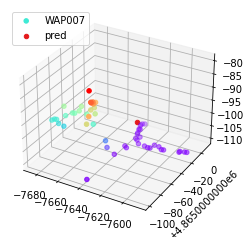

In [141]:
import GPy
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = df[["LONGITUDE"]].to_numpy().T[0]
y = df[["LATITUDE"]].to_numpy().T[0]
z =  df[["WAP007"]].to_numpy()
z_007 = df[["WAP007"]].to_numpy().T[0]
xx = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
x_pred, y_pred = -7632.1436, 4864982.2171
input_pred = np.array([[x_pred, y_pred]])

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(xx, z, kernel)
m.optimize(messages=True)
output_pred = m.predict(input_pred)[0].round().astype(int)
print(output_pred)
# ax.plot3D(x, y, z, 'gray')
ax.scatter(x, y, z_007, c=z_007, cmap='rainbow', label="WAP007")
ax.scatter(x_pred, y_pred, output_pred, c=output_pred, cmap='Set1', label="pred")
plt.legend(loc='upper left')
plt.show()